In [71]:
import pandas as pd
df = pd.read_csv('ten-year-scrape.csv', encoding= 'unicode_escape')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None)

In [72]:
df.head(3)

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_party,sponsor_name
0,S7728,https://www.nysenate.gov/legislation/bills/201...,Establishes a beer production tax credit for b...,"July 18, 2012",Tax,ZELDIN,Republican,Lee Zeldin
1,S6193,https://www.nysenate.gov/legislation/bills/201...,"Authorizes assessor of the town of Islip, coun...","July 18, 2012",Property Tax,ZELDIN,Republican,Lee Zeldin
2,S7131,https://www.nysenate.gov/legislation/bills/201...,Relates to limiting base proportion for the 20...,"June 29, 2012",Property Tax,ZELDIN,Republican,Lee Zeldin


In [73]:
df.bill_section.nunique()

221

In [74]:
df.dtypes

bill_number         object
bill_link           object
bill_description    object
bill_date           object
bill_section        object
bill_sponsor        object
sponsor_party       object
sponsor_name        object
dtype: object

In [75]:
df.bill_section.value_counts().head(5)

Tax                           386
Property Tax                  314
Environmental Conservation    281
Public Health                 266
Education                     257
Name: bill_section, dtype: int64

<AxesSubplot:>

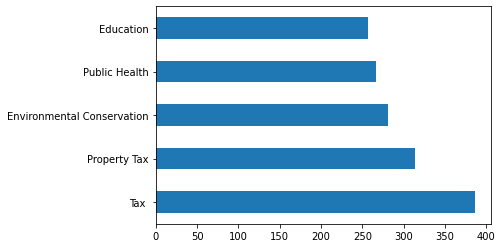

In [76]:
df.bill_section.value_counts().head(5).plot(kind='barh')

In [77]:
df.groupby(by='sponsor_party').bill_section.count()

sponsor_party
Democrat              3339
Independence Party      55
Independent              6
Republican            1538
Name: bill_section, dtype: int64

In [78]:
df.query('sponsor_party == "Republican"').bill_section.value_counts().head(5)

Tax                               186
Property Tax                      110
Highway                            85
Environmental Conservation         83
Retirement and Social Security     80
Name: bill_section, dtype: int64

In [79]:
df.query('sponsor_party == "Democrat"').bill_section.value_counts().head(5)

Public Health                 204
Property Tax                  198
Environmental Conservation    188
Education                     186
Tax                           173
Name: bill_section, dtype: int64

In [80]:
df.query('bill_section == "Military and veterans"').groupby(by='sponsor_party').count()

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_name
sponsor_party,,,,,,,
Democrat,8,8,8,8,8,8,8
Republican,6,6,6,6,6,6,6


In [81]:
df.query('bill_section == "Environmental Conservation"').groupby(by='sponsor_party').count()

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_name
sponsor_party,,,,,,,
Democrat,188,188,188,188,188,188,188
Independence Party,10,10,10,10,10,10,10
Republican,83,83,83,83,83,83,83


In [82]:
df.bill_section.value_counts()

Tax                                                          386
Property Tax                                                 314
Environmental Conservation                                   281
Public Health                                                266
Education                                                    257
Executive                                                    215
Retirement and Social Security                               173
Public Authorities                                           138
Insurance                                                    111
Highway                                                      106
General Municipal                                            100
Social Services                                               95
Election                                                      94
Alcoholic Beverage Control                                    93
Vehicle and Traffic                                           92
Local Finance            

In [83]:
df.query('bill_section == "Public Health"').groupby(by='sponsor_party').count()

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_name
sponsor_party,,,,,,,
Democrat,204,204,204,204,204,204,204
Republican,58,58,58,58,58,58,58
